# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [1]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os
import gc

GPU device not found
Found GPU at: 


In [2]:
gc.collect()

15

In [3]:
tf.keras.backend.set_floatx("float64")

In [4]:
dataset = "pets"
loader = dl.DataLoader(IMAGE_SIZE=128,dataset=dataset)
img_ds = loader.import_processed_img()
seg_ds = loader.import_processed_seg()

In [28]:
cardinality = img_ds.cardinality()
train_size = 1000
img_train = img_ds.take(train_size)
seg_train = seg_ds.take(train_size)
img_test = img_ds.skip(train_size)
seg_test = seg_ds.skip(train_size)

keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 keep_max 1344.0
keep_channels 56
ufilts.shape (1, 1, 1, 189, 56)
end loop 16.0
saving to: models/pets_img
out.shape (1, 16, 16, 56)
keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       ...,

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03959004],
        [0.03921569, 0

sample.shape (128, 128, 3)
pred.shape (1, 16, 16, 56)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  32.247585232705205
ncc =  [[1.         0.99297971]
 [0.99297971 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.03921569 0.03921569 0.03921569 0.03921569]
 [0.03921569 0.03921569 0.03921569 0.03921569]
 [0.03921569 0.03921569 0.03921569 0.03921569]
 [0.03921569 0.03921569 0.03921569 0.03921569]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.04063198 0.03628674 0.03830739 0.04227468]
 [0.03325402 0.05219423 0.05122618 0.05949696]
 [0.03820976 0.03723757 0.05227938 0.0464113 ]
 [0.05532254 0.05313877 0.04808176 0.06345149]], shape=(4, 4), dtype=float64)


(32.247585232705205,
 array([[1.        , 0.99297971],
        [0.99297971, 1.        ]]))

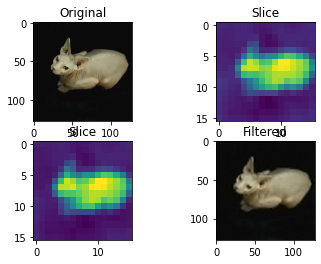

In [122]:
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname=dataset+"_img",
                            keep_percent=0.3,
                            count=3,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      
img_broker.check_build(imghead,imginvhead,img_train)

keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8
ufilts.shape (1, 1, 1, 27, 8)
end loop 64.0
Starting level 1
Completing 32.0
pca shape tf.Tensor([72 72], shape=(2,), dtype=int32)
keep_channels 21 keep_max 128.0
keep_channels 21
ufilts.shape (1, 1, 1, 72, 21)
end loop 32.0
Starting level 2
Completing 16.0
pca shape tf.Tensor([189 189], shape=(2,), dtype=int32)
keep_channels 56 keep_max 1344.0
keep_channels 56
ufilts.shape (1, 1, 1, 189, 56)
end loop 16.0
saving to: models/pets_seg
out.shape (1, 16, 16, 56)
keep_percent 0.29752575559207534
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 64.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 8 keep_max 12.0
keep_channels 8

array([[[0.84942555, 0.78275889, 0.6705423 ],
        [0.85046721, 0.78723192, 0.66910231],
        [0.86318934, 0.80219442, 0.6906212 ],
        ...,
        [0.8656863 , 0.62475491, 0.3214193 ],
        [0.86397058, 0.62303925, 0.32132354],
        [0.85618871, 0.61525732, 0.3113358 ]],

       [[0.84637332, 0.77970666, 0.66695392],
        [0.83065641, 0.77130437, 0.6597963 ],
        [0.58282787, 0.5489009 , 0.45932138],
        ...,
        [0.8495481 , 0.60978478, 0.29975492],
        [0.85543048, 0.60724187, 0.29087013],
        [0.85397899, 0.59907705, 0.28044963]],

       [[0.84638476, 0.7797181 , 0.66991419],
        [0.84601712, 0.77935046, 0.66954654],
        [0.85332036, 0.7866537 , 0.67108995],
        ...,
        [0.86974192, 0.63297719, 0.34562269],
        [0.85328585, 0.61292511, 0.30216378],
        [0.85171568, 0.60465688, 0.29166669]],

       ...,

       [[0.7645604 , 0.68203127, 0.53418356],
        [0.81247699, 0.73272061, 0.60319012],
        [0.81539905, 0

sample.shape (128, 128, 3)


pred.shape (1, 16, 16, 56)
recon.shape (128, 128, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 49152
psnr =  27.189848892191186
ncc =  [[1.         0.99107779]
 [0.99107779 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.9386642  0.94117647 0.9388442  0.93646979]
 [0.94258577 0.94017696 0.93946081 0.94117647]
 [0.94196922 0.93682593 0.93803233 0.93835402]
 [0.93172872 0.93602943 0.94253218 0.82833183]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.96225991 0.9442454  0.99537903 0.99748922]
 [0.96469579 0.95137111 1.00708307 1.02688323]
 [1.08006915 1.01603702 0.96188784 0.83469866]
 [1.11292987 1.04392187 0.87599777 0.59067995]], shape=(4, 4), dtype=float64)


(27.189848892191186,
 array([[1.        , 0.99107779],
        [0.99107779, 1.        ]]))

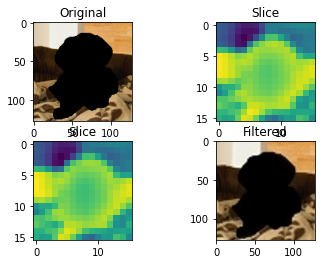

In [123]:
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname=dataset+"_seg",
                            keep_percent=0.3,
                            count=3,
                            sample_size=100)
                            #activity_regularizer =scaledtanh ,
                            #inverse_activity_regularizer=scaledatanh ,
                            #activation_before=False)
seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()
seg_broker.check_build(seghead,seginvhead,seg_test)

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [ ]:
imgflat = np.prod(imghead(next(iter(img_train))[0]).shape)
segflat = np.prod(seghead(next(iter(seg_train))[0]).shape)
end_shape = next(iter(seg_train))[0].shape
n = 0.0

xxt = np.zeros([imgflat])
yxt = np.zeros([segflat])
x = np.zeros([imgflat])
y = np.zeros([segflat]) 

bar = tqdm.notebook.tqdm(total = int(img_train.cardinality()))

for item in iter(zip(img_train,seg_train)):

    bar.update(1)

    image = item[0][0]
    segmentation = item[1][0]

    imgdecom = imghead(image)
    segdecom = seghead(segmentation)

    mat = tf.reshape(imgdecom,[-1])
    segmat = tf.reshape(segdecom,[-1])

    cov = tf.matmul([mat],[mat],transpose_a=True)
    xxt += cov
    segcov = tf.matmul([mat],[segmat],transpose_a=True)
    yxt += segcov
    x+=mat
    y+=segmat
    n += 1

print("loop calculated")
xxt = xxt - tf.matmul([x],[x],transpose_a=True)/n
yxt = yxt - tf.matmul([x],[y],transpose_a=True)/n
print("calculating inverse")
inverse_xxt = tf.linalg.pinv(xxt)
print("calculating A")
A = tf.linalg.matmul(inverse_xxt,yxt)
print("calculating b")
b = (y - tf.linalg.matvec(A,x,transpose_a=True))/n

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
#b = (y - tf.linalg.matvec(A,x,transpose_a=True))

In [ ]:
iterable = iter(zip(img_train,seg_train))

In [ ]:
threshold_intensity = 0.001
dice_coeff_vals = []
iou_coeff_vals = []
n = 0
reconstruct = seghead(next(iter(seg_ds))[0]).shape
image,seg_base = next(iterable)
imgdecom = imghead(image[0])
imgdecom = tf.reshape(imgdecom,(1,-1))
segdecom = tf.linalg.matvec(A,imgdecom,transpose_a=True)+b
seg = seginvhead(tf.reshape(segdecom,(reconstruct)))
y_true = tf.cast(tf.reduce_min(seg_base[0],2)==0,tf.float64)
y_pred = tf.cast(tf.reduce_min(seg[0],2)<threshold_intensity,tf.float64)
#dice_coeff_vals.append(dice_coef(y_true,y_pred))
#iou_coeff_vals.append(iou_coef(y_true,y_pred))
n+=1
plt.subplot(2,1,1)
plt.imshow(np.hstack([image[0],seg_base[0],seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([y_true,y_pred]))

In [ ]:
img_train, img_test = loader.import_processed_img()

In [ ]:
threshold_intensity = 0.1

image,seg_base = next(iter(zip(img_train,seg_train)))
imgdecom = imghead(image[0])

conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)
seg = seginvhead(conv)

plt.subplot(2,1,1)
plt.imshow(np.hstack([image,seg_base,seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([tf.reduce_min(seg_base,2)==0,tf.reduce_min(seg[0],2)<threshold_intensity]))